# Install Libraries

In [386]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

# Load Dataset

In [387]:
df = pd.read_csv('Mall_Customers.csv')

# Exploratory Data Analysis (EDA)

In [388]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [389]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [391]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [392]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

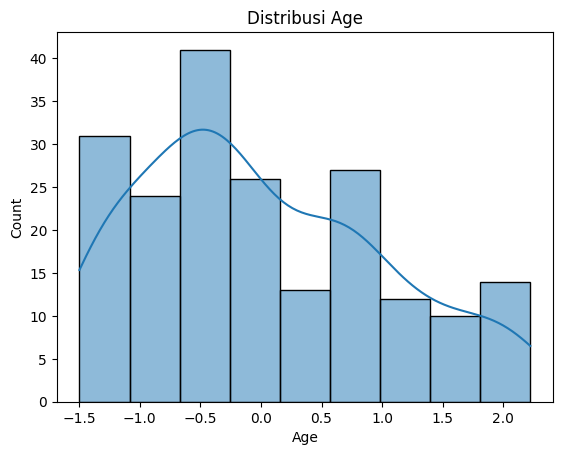

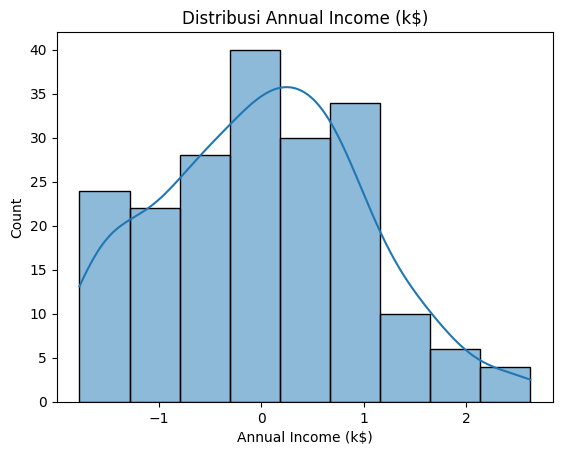

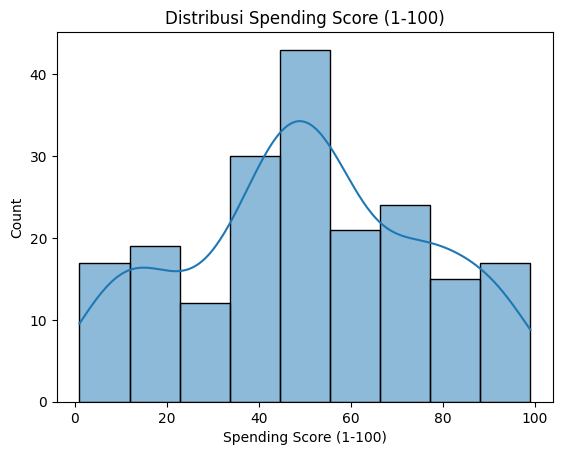

In [441]:
linear_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]

for feature in linear_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribusi {feature}')
    plt.show()

Diagram menunjukkan bahwa distribusi usia paling banyak yang mengunjungi mall berada pada usia 29-35 tahun, annual income pengunjung terbanyak berada pada 50-65k$, dan distribusi spending score (skala pengeluaran) paling banyak berada di skala 45-50.

<Axes: xlabel='Gender', ylabel='count'>

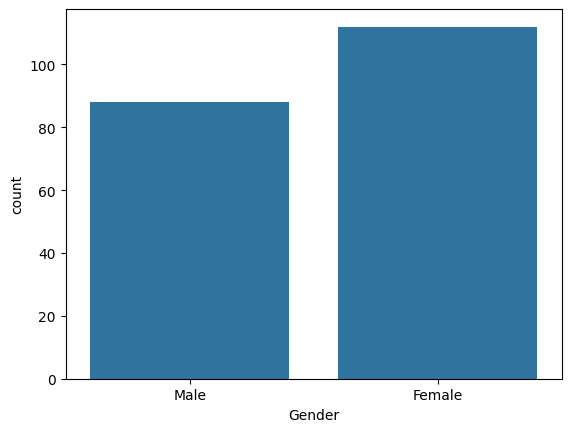

In [394]:
sns.countplot(x='Gender', data=df)

Pengunjung perempuan lebih banyak 20% dibanding pengunjung laki-laki.

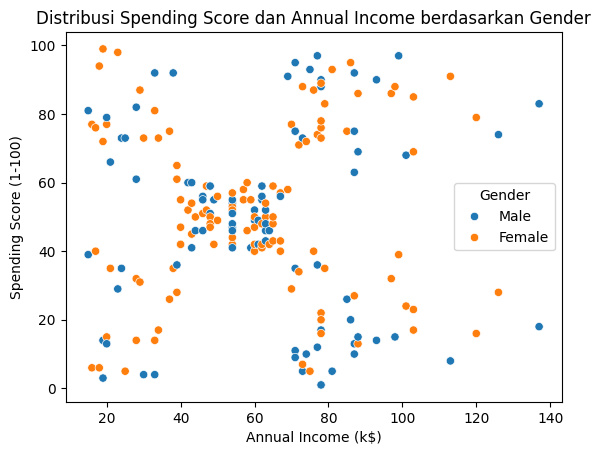

In [395]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title("Distribusi Spending Score dan Annual Income berdasarkan Gender")
plt.show()

Perbandingan spending score dengan pendapatan tahunan memiliki distribusi yang merata dan memuncak di tengah.

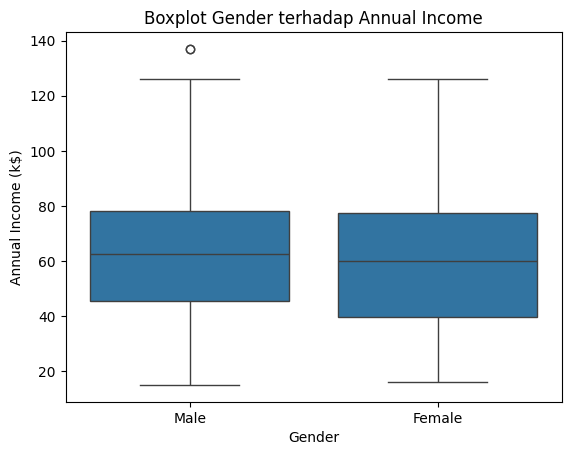

In [396]:
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title("Boxplot Gender terhadap Annual Income")
plt.show()

Pendapatan tahunan antara laki-laki dan perempuan hampir sama, terdapat outlier pada annual income laki-laki.

# Preprocessing

In [397]:
df = df.drop('CustomerID', axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

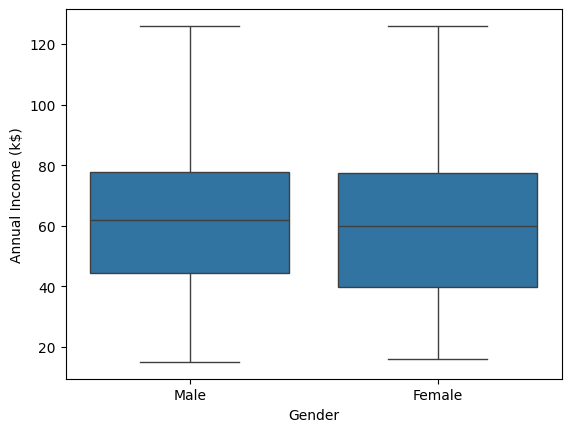

In [398]:
#Outlier
df_filtered = df[df['Annual Income (k$)'] > 135]
df_filtered
df = df.drop(index=[198, 199])
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)


In [399]:
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [400]:
scaler = StandardScaler()
numeric_features = ['Age', 'Annual Income (k$)']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  198 non-null    int32  
 1   Age                     198 non-null    float64
 2   Annual Income (k$)      198 non-null    float64
 3   Spending Score (1-100)  198 non-null    int64  
dtypes: float64(2), int32(1), int64(1)
memory usage: 5.5 KB


# Split Data

In [402]:
X = df.drop('Spending Score (1-100)', axis=1) 
y = df['Spending Score (1-100)'] 


In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (158, 3) (158,)
Test set: (40, 3) (40,)


# Training

## Linear Regression

In [404]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)


## Decision Tree

In [405]:
from sklearn.tree import DecisionTreeRegressor

param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_reg = DecisionTreeRegressor()
grid_search_tree = GridSearchCV(tree_reg, param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_search_tree.fit(X_train, y_train)
best_tree_reg = grid_search_tree.best_estimator_

y_pred_tree = best_tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)


## XGBoost Regressor

In [406]:
from xgboost import XGBRegressor

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb_reg = XGBRegressor()
grid_search_xgb = GridSearchCV(xgb_reg, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)
best_xgb_reg = grid_search_xgb.best_estimator_

y_pred_xgb = best_xgb_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Evaluation

In [407]:
cv_scores_lin = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_tree = cross_val_score(best_tree_reg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_xgb = cross_val_score(best_xgb_reg, X, y, cv=5, scoring='neg_mean_squared_error')

In [408]:
print(f"Regresi Linier - MSE: {mse_lin}, MAE: {mae_lin}")
print(f"Decision Tree - MSE: {mse_tree}, MAE: {mae_tree}")
print(f"XGBoost - MSE: {mse_xgb}, MAE: {mae_xgb}")

Regresi Linier - MSE: 602.119471112306, MAE: 20.371883483071127
Decision Tree - MSE: 401.6454782986111, MAE: 14.382083333333336
XGBoost - MSE: 436.377628895884, MAE: 15.740010309219361


In [409]:
print(f"Regresi Linier - Explained Variance: {explained_variance_score(y_test, y_pred_lin)}, R2: {r2_score(y_test, y_pred_lin)}")
print(f"Decision Tree - Explained Variance: {explained_variance_score(y_test, y_pred_tree)}, R2: {r2_score(y_test, y_pred_tree)}")
print(f"XGBoost - Explained Variance: {explained_variance_score(y_test, y_pred_xgb)}, R2: {r2_score(y_test, y_pred_xgb)}")

Regresi Linier - Explained Variance: 0.133670103056872, R2: 0.12458459296563584
Decision Tree - Explained Variance: 0.42174793488320017, R2: 0.41605170279784953
XGBoost - Explained Variance: 0.3825097059278173, R2: 0.3655549804511653


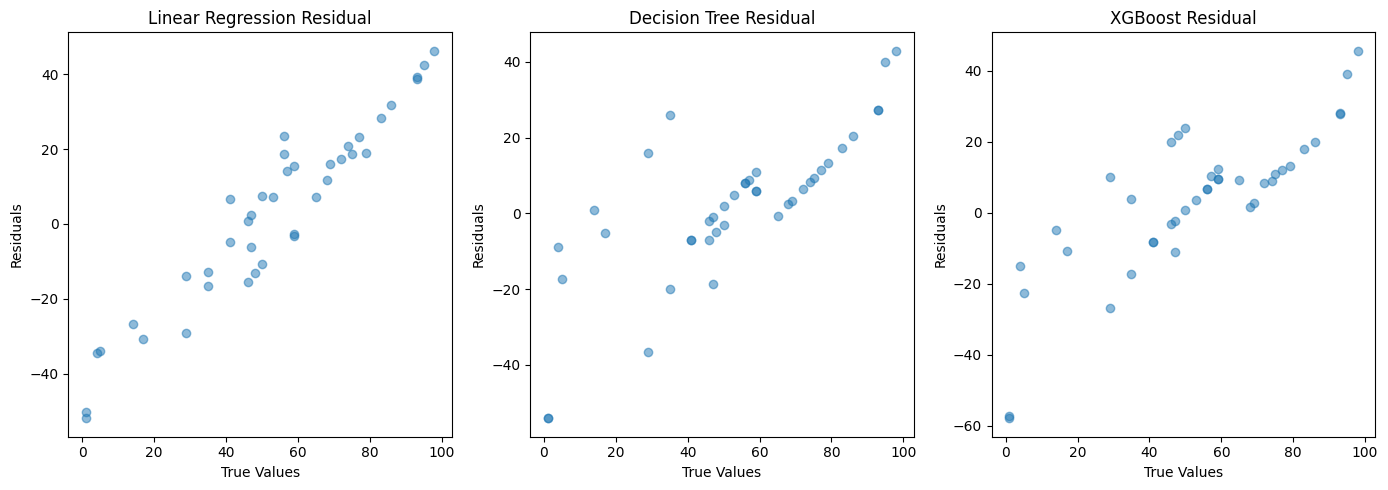

In [410]:
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
plt.scatter(y_test, y_test - y_pred_lin, alpha=0.5)
plt.title("Linear Regression Residual")
plt.xlabel("True Values")
plt.ylabel("Residuals")

plt.subplot(1,3,2)
plt.scatter(y_test, y_test - y_pred_tree, alpha=0.5)
plt.title("Decision Tree Residual")
plt.xlabel("True Values")
plt.ylabel("Residuals")

plt.subplot(1,3,3)
plt.scatter(y_test, y_test - y_pred_xgb, alpha=0.5)
plt.title("XGBoost Residual")
plt.xlabel("True Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

In [411]:
print(f"Linear Regression - CV MSE: {-np.mean(cv_scores_lin)}")
print(f"Decision Tree - CV MSE: {-np.mean(cv_scores_tree)}")
print(f"XGBoost - CV MSE: {-np.mean(cv_scores_xgb)}")

Linear Regression - CV MSE: 668.9805410486731
Decision Tree - CV MSE: 634.16021284051
XGBoost - CV MSE: 527.7001384930372


# Predict

In [436]:
def preprocess_input(age, gender, annual_income):
    gender_encoded = le.transform([gender])[0]
    input_data = pd.DataFrame([[age, gender_encoded, annual_income]],
                              columns=['Age', 'Gender', 'Annual Income (k$)'])
    input_data[['Age', 'Annual Income (k$)']] = scaler.transform(
        input_data[['Age', 'Annual Income (k$)']]
    )
    input_data = input_data[['Gender', 'Age', 'Annual Income (k$)']]
    return input_data

In [437]:
def predict_linreg(age, gender, annual_income):
    input_data = preprocess_input(age, gender, annual_income)
    return lin_reg.predict(input_data)[0]

In [438]:
def predict_decision_tree(age, gender, annual_income):
    input_data = preprocess_input(age, gender, annual_income)
    return best_tree_reg.predict(input_data)[0]

In [439]:
def predict_xgb(age, gender, annual_income):
    input_data = preprocess_input(age, gender, annual_income)
    return best_xgb_reg.predict(input_data)[0]

In [440]:
age = 30
gender = 'Male'
annual_income = 60

print(f"Prediksi Spending Score dengan Linear Regression: {predict_linreg(age, gender, annual_income): .2f}")
print(f"Prediksi Spending Score dengan Decision Tree: {predict_decision_tree(age, gender, annual_income): .2f}")
print(f"Prediksi Spending Score dengan XGBoost: {predict_xgb(age, gender, annual_income): .2f}" )


Prediksi Spending Score dengan Linear Regression:  55.36
Prediksi Spending Score dengan Decision Tree:  65.65
Prediksi Spending Score dengan XGBoost:  58.19


In [381]:
# import joblib

# # Save models
# joblib.dump(lin_reg, 'linear_model.pickle')
# joblib.dump(best_tree_reg, 'tree_model.pickle')
# joblib.dump(best_xgb_reg, 'xgb_model.pickle')
# joblib.dump(scaler, 'scaler.pickle')
# joblib.dump(le, 'label_encoder.pickle')

# # # Load models
# # lin_reg = joblib.load('linear_model.pkl')
# # best_tree_reg = joblib.load('tree_model.pkl')
# # best_xgb_reg = joblib.load('xgb_model.pkl')


['label_encoder.pickle']